# Hw3-1

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
DATA_NAME = 'mnist_traindata.hdf5'
with h5py.File(DATA_NAME, 'r') as hf:
    print(list(hf.keys()))
    xdata = hf['xdata'][:]
    ydata = hf['ydata'][:]

['xdata', 'ydata']


In [10]:
TEST_NAME = 'mnist_testdata.hdf5'
with h5py.File(TEST_NAME, 'r') as hf:
    print(list(hf.keys()))
    x_test = hf['xdata'][:]
    y_test = hf['ydata'][:]

['xdata', 'ydata']


In [11]:
print(xdata.shape)
print(ydata.shape)

(60000, 784)
(60000, 10)


In [12]:
print(x_test.shape)

(10000, 784)


# (a)

In [13]:
def SplitData(xdata,train_num):
    x_train=xdata[:train_num][:]
    x_val=xdata[train_num:][:]
    return x_train,x_val

In [14]:
x_train,x_val=SplitData(xdata,50000)
y_train,y_val=SplitData(ydata,50000)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print(y_train[0])

(50000, 784)
(10000, 784)
(50000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# (b)

# b

In [15]:
# def hidden_layer(input,output):
#     w=np.random.rand(input*output)
#     b=np.random.rand(output)
#     w=np.reshape(w,(output,input))
#     b=np.reshape(b,(output,1))
#     return w,b
def hidden_layer(input,output):
    w = np.random.normal(0, 2 / input, (output, input))
    b = np.zeros((output, 1))
    return w,b

# c

In [16]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t
def tanh_div(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return dt
def ReLu(x):
    return np.maximum(0,x)

def ReLU_div(x):
    return (x > 0).astype(float)

def Softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)[:, None].T

In [17]:
def CrossEntropy(y, a):
    return -np.sum(y * np.log(a))

In [19]:
def update_ReLu(x,y,batch_size,error,l,w1,b1,w2,b2,w3,b3):
    regular = 1e-5
    x1=ReLu(w1@x+b1)
    x2=ReLu(w2@x1+b2)
    x3=Softmax(w3@x2+b3)
    
    result=CrossEntropy(y,x3)
    
    w3_update=w3-(l*error@(x2.T))/batch_size - 2* regular * w3
    b3_update=b3-l*np.sum(error,axis=1)[:,None]/batch_size
    
    error2=ReLU_div(w2@x1+b2)*(w3.T@error)
    w2_update=w2-(l*error2@(x1.T))/batch_size- 2* regular * w2
    b2_update=b2-l*np.sum(error2,axis=1)[:,None]/batch_size
    
    error3=ReLU_div(w1@x+b1)*(w2.T@error2)
    w1_update=w1-(l*error3@(x.T))/batch_size- 2* regular * w1
    b1_update=b1-l*np.sum(error3,axis=1)[:,None]/batch_size
    return w3_update,b3_update,w2_update,b2_update,w1_update,b1_update
def update_tanh(x,y,batch_size,error,l,w1,b1,w2,b2,w3,b3):
    regular = 1e-5
    x1=tanh(w1@x+b1)
    x2=tanh(w2@x1+b2)
    x3=Softmax(w3@x2+b3)
    
    w3_update=w3-(l*error@(x2.T))/batch_size - 2* regular * w3
    b3_update=b3-l*np.sum(error,axis=1)[:,None]/batch_size
    
    error2=tanh_div(w2@x1+b2)*(w3.T@error)
    w2_update=w2-(l*error2@(x1.T))/batch_size- 2* regular * w2
    b2_update=b2-l*np.sum(error2,axis=1)[:,None]/batch_size
    
    error3=tanh_div(w1@x+b1)*(w2.T@error2)
    w1_update=w1-(l*error3@(x.T))/batch_size- 2* regular * w1
    b1_update=b1-l*np.sum(error3,axis=1)[:,None]/batch_size
    return w3_update,b3_update,w2_update,b2_update,w1_update,b1_update

In [20]:
def feedprop_ReLu(x,y,w1,b1,w2,b2,w3,b3):
    x=np.reshape(x,(784,1))
    y=np.reshape(y,(10,1))
    x1=ReLu(w1@x+b1)
    x2=ReLu(w2@x1+b2)
    x3=Softmax(w3@x2+b3)
    error=x3-y
    return error
def feedprop_tanh(x,y,w1,b1,w2,b2,w3,b3):
    x=np.reshape(x,(784,1))
    y=np.reshape(y,(10,1))
    x1=tanh(w1@x+b1)
    x2=tanh(w2@x1+b2)
    x3=Softmax(w3@x2+b3)
    error=x3-y
    return error

In [21]:
def eval_model_ReLu(xdata,ydata,w1,b1,w2,b2,w3,b3):
    x1=ReLu(w1@xdata.T+b1)
    x2=ReLu(w2@x1+b2)
    x3=Softmax(w3@x2+b3)
    x3=x3.T
    
    accuracy=0.0
    for i in range(xdata.shape[0]):
        if(np.argmax(x3[i])==np.argmax(ydata[i])):
            accuracy+=1
    accuracy=accuracy/ydata.shape[0]
    loss=CrossEntropy(ydata,x3)/ydata.shape[0]
    return accuracy,loss
def eval_model_tanh(xdata,ydata,w1,b1,w2,b2,w3,b3):
    x1=tanh(w1@xdata.T+b1)
    x2=tanh(w2@x1+b2)
    x3=Softmax(w3@x2+b3)
    x3=x3.T
    
    accuracy=0.0
    for i in range(xdata.shape[0]):
        if(np.argmax(x3[i])==np.argmax(ydata[i])):
            accuracy+=1
    accuracy=accuracy/ydata.shape[0]
    loss=CrossEntropy(ydata,x3)/ydata.shape[0]
    return accuracy,loss

In [22]:
def nn(x_train,x_val,y_train,y_val,learning_rate,batch_size,epoch=1):
    np.random.seed(seed=24)
    w1,b1=hidden_layer(784,128)
    w2,b2=hidden_layer(128,64)
    w3,b3=hidden_layer(64,10)
    
    train_loss_list=[]
    train_acc_list=[]
    val_loss_list=[]
    val_acc_list=[]
    
    for times in range(epoch):
        for updates in range(int(x_train.shape[0]/batch_size)):
            total_error=np.zeros((500,10,1))
            for data in range(batch_size):
                x=x_train[data+batch_size*updates]
                y=y_train[data+batch_size*updates]
                total_error[data]=feedprop_ReLu(x,y,w1,b1,w2,b2,w3,b3) 
            w3,b3,w2,b2,w1,b1=update_ReLu(x_train[updates*batch_size:(updates+1)*batch_size,:].T,
                                          y_train[updates*batch_size:(updates+1)*batch_size,:].T,
                                          batch_size,np.reshape(total_error,(500,10)).T,learning_rate,
                                          w1,b1,w2,b2,w3,b3)
                   
        train_accuracy,train_loss=eval_model_ReLu(x_train,y_train,w1,b1,w2,b2,w3,b3)
        val_accuracy,val_loss=eval_model_ReLu(x_val,y_val,w1,b1,w2,b2,w3,b3)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_accuracy)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_accuracy)
        
        
        if(times==19 or times==39):
            learning_rate=learning_rate/2
        print('Epoch:%d,Train Loss:%f,Training Accuracy:%f,Validation Loss:%f,Validation Accuracy:%f'%(times+1,train_loss,train_accuracy,val_loss,val_accuracy))
    return train_loss_list,train_acc_list,val_loss_list,val_acc_list,w1,w2,w3,b1,b2,b3

In [34]:
learning_rate=0.01
batch_size=500
train_loss,train_acc,val_loss,val_acc,w1,w2,w3,b1,b2,b3=nn(x_train,x_val,y_train,y_val,learning_rate,batch_size,epoch=50)
# learning_rate=0.001
# batch_size=500
# train_loss,train_acc,val_loss,val_acc,w1,w2,w3,b1,b2,b3=nn(x_train,x_val,y_train,y_val,learning_rate,batch_size,epoch=50)
# learning_rate=0.005
# batch_size=500
# train_loss,train_acc,val_loss,val_acc,w1,w2,w3,b1,b2,b3=nn(x_train,x_val,y_train,y_val,learning_rate,batch_size,epoch=50)

Epoch:1,Train Loss:1.464628,Training Accuracy:0.796260,Validation Loss:1.454306,Validation Accuracy:0.811700
Epoch:2,Train Loss:0.954405,Training Accuracy:0.864940,Validation Loss:0.938425,Validation Accuracy:0.877500
Epoch:3,Train Loss:0.679298,Training Accuracy:0.897460,Validation Loss:0.659628,Validation Accuracy:0.904200
Epoch:4,Train Loss:0.517998,Training Accuracy:0.910900,Validation Loss:0.499065,Validation Accuracy:0.916100
Epoch:5,Train Loss:0.420044,Training Accuracy:0.918300,Validation Loss:0.406638,Validation Accuracy:0.919900
Epoch:6,Train Loss:0.362368,Training Accuracy:0.924180,Validation Loss:0.350130,Validation Accuracy:0.927000
Epoch:7,Train Loss:0.325788,Training Accuracy:0.929760,Validation Loss:0.314241,Validation Accuracy:0.932900
Epoch:8,Train Loss:0.304235,Training Accuracy:0.933320,Validation Loss:0.297787,Validation Accuracy:0.932500
Epoch:9,Train Loss:0.275274,Training Accuracy:0.937660,Validation Loss:0.269274,Validation Accuracy:0.939000
Epoch:10,Train Loss

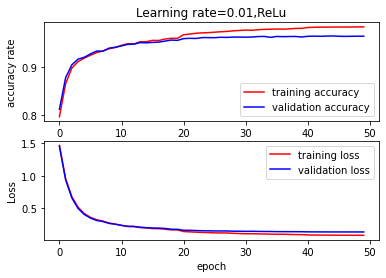

In [39]:
plt.figure()
plt.subplot(211)
plt.title('Learning rate=0.01,ReLu')
plt.xlabel('epoch')
plt.ylabel('accuracy rate')
plt.plot(train_acc,c='r',label='training accuracy')
plt.plot(val_acc,c='b',label='validation accuracy')
plt.legend()
plt.subplot(212)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.plot(train_loss,c='r',label='training loss')
plt.plot(val_loss,c='b',label='validation loss')
plt.legend()
plt.show()

In [38]:
test_accuracy,test_loss=eval_model_tanh(x_test,y_test,w1,b1,w2,b2,w3,b3)
print(test_accuracy)

0.9584
